In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

C:\Users\User\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\User\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('data.txt', delimiter=r"\s+", header=None)
df = df.T
df.shape

(500, 3)

In [3]:
df.columns = ['x1', 'x2', 'classes']
df

,x1,x2,classes
0,-0.7470,0.630,5.0
1,-0.1530,-0.845,4.0
2,0.2270,-0.534,3.0
3,0.0776,-0.969,3.0
4,-0.8690,0.107,5.0
...,...,...,...
495,0.5380,-0.272,2.0
496,-1.3200,0.119,4.0
497,0.6410,0.489,1.0
498,-0.6240,0.361,1.0


In [4]:
class_names = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5']

In [5]:
input_data = df[['x1', 'x2']].values
output_data = df[['classes']].values

In [6]:
input_data.shape

(500, 2)

In [7]:
output_data.shape

(500, 1)

In [8]:
for i in range(500):
    output_data[i,0]= int(output_data[i,0])
output_data.flatten()

array([5., 4., 3., 3., 5., 3., 2., 3., 2., 5., 3., 2., 2., 3., 2., 1., 4.,
       2., 3., 5., 3., 2., 2., 5., 1., 3., 1., 3., 4., 3., 1., 2., 4., 2.,
       5., 5., 5., 4., 2., 5., 3., 4., 5., 1., 4., 4., 1., 5., 1., 4., 2.,
       3., 3., 1., 3., 1., 3., 4., 5., 3., 2., 2., 1., 2., 3., 2., 4., 2.,
       3., 5., 4., 2., 4., 5., 5., 1., 5., 4., 4., 5., 2., 5., 3., 3., 5.,
       3., 4., 4., 5., 3., 1., 5., 5., 4., 3., 2., 3., 2., 4., 2., 4., 2.,
       3., 3., 5., 5., 1., 5., 1., 1., 1., 4., 4., 5., 1., 2., 4., 1., 3.,
       1., 2., 2., 2., 5., 4., 2., 5., 4., 3., 1., 2., 2., 2., 4., 1., 5.,
       5., 5., 1., 3., 1., 1., 4., 3., 4., 1., 1., 1., 3., 1., 2., 5., 5.,
       2., 5., 1., 4., 1., 1., 3., 2., 1., 3., 5., 3., 3., 5., 5., 4., 2.,
       3., 3., 5., 4., 3., 2., 1., 1., 4., 2., 1., 4., 1., 2., 2., 4., 4.,
       3., 4., 5., 2., 3., 3., 4., 2., 2., 5., 1., 5., 2., 2., 4., 5., 2.,
       3., 5., 5., 1., 2., 1., 2., 5., 5., 5., 5., 4., 2., 5., 1., 3., 3.,
       2., 3., 1., 2., 4.

In [9]:
e = LabelEncoder()
e.fit(output_data)
label = e.transform(output_data)
output_data_encoded = tf.keras.utils.to_categorical(output_data)
output_data_encoded.shape

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(500, 6)

In [10]:
output_data_fix = np.zeros([500,5])
for i in range (500):
    for p in range (5):
        output_data_fix[i,p]=output_data_encoded[i,p+1]
output_data_fix

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [11]:
print(input_data.shape)
print(output_data_fix.shape)

(500, 2)
(500, 5)


In [12]:
input_train = input_data[:400]
output_train = output_data_fix[:400]
input_test = input_data[400:]
output_test = output_data_fix[400:]

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu',input_shape=input_data[0].shape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 17,541
Trainable params: 17,541
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
r = model.fit(input_train, output_train, epochs=500)

Epoch 1/500
13/13 [==============================] - 1s 1ms/step - loss: 1.4896 - accuracy: 0.5550
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 1.2115 - accuracy: 0.7300
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.9392 - accuracy: 0.7550
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.7083 - accuracy: 0.7800
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5721 - accuracy: 0.7925
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.7975
Epoch 7/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.8050
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8225
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8175
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.8150
Epoch 11/

13/13 [==============================] - 0s 2ms/step - loss: 0.2645 - accuracy: 0.8800
Epoch 84/500
13/13 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.8900
Epoch 85/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2544 - accuracy: 0.8875
Epoch 86/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2526 - accuracy: 0.8925
Epoch 87/500
13/13 [==============================] - 0s 2ms/step - loss: 0.2523 - accuracy: 0.8875
Epoch 88/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2511 - accuracy: 0.8925
Epoch 89/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2452 - accuracy: 0.8975
Epoch 90/500
13/13 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.8925
Epoch 91/500
13/13 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.8925
Epoch 92/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2437 - accuracy: 0.8925
Epoch 93/500


13/13 [==============================] - 0s 2ms/step - loss: 0.1961 - accuracy: 0.9200
Epoch 246/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9150
Epoch 247/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1950 - accuracy: 0.9150
Epoch 248/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9175
Epoch 249/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9150
Epoch 250/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9225
Epoch 251/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9200
Epoch 252/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1934 - accuracy: 0.9200
Epoch 253/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.9175
Epoch 254/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9175
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.1812 - accuracy: 0.9175
Epoch 408/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1747 - accuracy: 0.9200
Epoch 409/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.9275
Epoch 410/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.9250
Epoch 411/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1750 - accuracy: 0.9250
Epoch 412/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1780 - accuracy: 0.9200
Epoch 413/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1689 - accuracy: 0.9225
Epoch 414/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.9225
Epoch 415/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1725 - accuracy: 0.9250
Epoch 416/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1772 - accuracy: 0.9225
Epoc

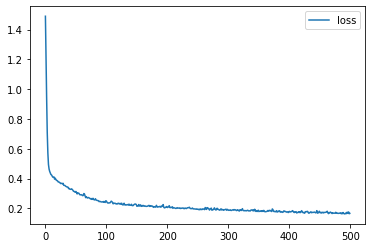

In [16]:
plt.plot(r.history['loss'],label = 'loss')
plt.legend()
plt.show()

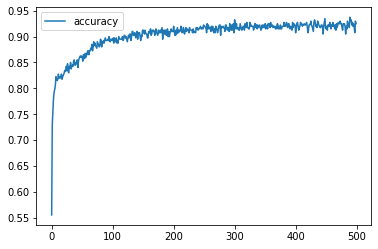

In [17]:
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.legend()
plt.show()

In [18]:
model.evaluate(input_test, output_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.2160 - accuracy: 0.8900


[0.21603931486606598, 0.8899999856948853]

In [19]:
test = model.predict(input_data)
print(test)

[[7.7485093e-03 4.1400377e-12 3.6914407e-18 1.5922999e-10 9.9225146e-01]
 [1.5363322e-10 4.1166661e-09 3.5202127e-02 9.6479702e-01 9.3260070e-07]
 [4.8514237e-05 3.1148973e-03 9.9546379e-01 1.3625066e-03 1.0172619e-05]
 ...
 [9.9999952e-01 5.1254148e-07 1.8276171e-20 2.5017225e-24 1.3699251e-11]
 [3.2597709e-01 4.9137081e-09 3.1449090e-14 1.2044551e-08 6.7402291e-01]
 [7.6386285e-01 9.4837412e-07 3.9926911e-13 5.0691837e-09 2.3613626e-01]]


In [20]:
for p in range(500):
    haha = test[p,0]+test[p,1]+test[p,2]+test[p,3]+test[p,4]
    print(haha)

0.99999994
1.0000001
0.9999999
1.0
1.0
1.0
1.0
1.0
1.0000001
1.0000001
1.0
1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
0.99999994
1.0
0.99999994
1.0
1.0
0.99999994
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0000001
1.0
0.99999994
1.0
1.0
0.9999999
1.0
0.99999994
1.0
1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
0.99999994
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999
1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0000001
1.0
1.0000001
1.0
0.99999994
1.0
0.99999994
1.0
0.99999994
1.0
1.0
1.0
1.0
0.99999994
0.99999994
1.0
1.0
1.0
1.0
0.99999994
1.0
1.0
1.0000001
1.0
1.0
0.9999999
0.9999999
1.0
1.0
1.0000001
1.0
1.0
1.0
1.0
1.0
1.0
1.0000001
0.99999994
0.99999994
1.0
1.0
1.0
1.0000001
1.0000001
0.99999994
1.0000001
1.0
0.99999994
0.99999994
1.0
0.99999994
1.0
1.0
0.9999999
1.0
1.0
1.0
1.0
0.99999994
1.0
1.0000001
1.0
1.0
0.99999994
1.0
1.0
0.99999994
1.0
1.0
1.0
0.99999994
0.99999994
1.0
1.0
1.0
1.0
1.0
0.99999994
1.0
1.0
1.0
0.9999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0000001
1.0
1.0000001
1.0
0.99999994
1.0
1.0

In [21]:
test.shape

(500, 5)

In [22]:
def get_label(predictions):
    hehe = np.argmax(predictions)
    label = hehe+1
    return label

In [23]:
for i in range(500):
    print(get_label(test[i]))

5
4
3
3
5
3
2
2
2
5
3
2
2
2
2
5
4
2
3
5
3
2
2
5
1
2
1
3
4
3
1
2
4
2
5
5
5
4
2
5
3
4
1
1
4
4
1
5
1
4
2
3
3
1
3
1
3
4
4
3
2
2
1
2
3
2
4
2
3
5
4
2
3
5
5
1
5
4
4
5
3
5
3
3
5
3
4
4
5
3
2
5
5
4
3
2
3
2
4
2
4
2
3
3
5
5
1
5
1
1
1
4
4
5
1
3
4
1
3
1
2
2
2
5
4
2
5
4
3
1
2
2
2
4
1
5
5
5
1
3
1
1
4
3
4
5
2
1
3
1
2
5
5
2
5
1
4
1
2
3
2
1
3
5
3
3
5
5
4
2
3
3
5
4
3
3
1
1
4
2
5
4
1
2
2
4
4
3
4
5
2
3
3
4
2
2
5
5
5
2
2
4
5
2
3
5
5
1
2
1
2
5
5
5
5
4
2
5
1
2
3
2
3
1
2
4
4
2
4
1
1
2
1
1
4
1
1
5
1
4
1
2
2
1
2
2
4
5
5
3
4
2
5
2
4
5
2
2
5
4
4
4
1
3
5
4
2
3
4
4
5
2
4
4
3
5
1
3
2
2
5
2
2
5
1
2
4
1
4
1
5
2
2
3
2
1
4
5
3
1
3
3
3
4
5
1
5
3
1
2
5
3
2
3
1
1
5
2
3
3
5
2
4
1
4
1
1
4
3
2
2
3
4
2
4
5
1
3
3
2
5
5
4
1
2
4
3
4
3
1
2
1
4
2
3
1
3
4
3
5
3
2
2
3
5
3
1
4
2
1
5
2
1
5
4
3
4
1
5
1
2
2
2
5
4
2
5
5
3
3
3
1
2
5
4
1
5
4
2
2
4
1
3
2
5
5
2
1
1
2
1
5
3
3
1
3
5
4
4
4
5
3
1
5
3
5
1
3
2
3
4
2
4
1
2
2
2
1
4
4
4
5
3
3
5
2
1
4
3
1
2
4
2
5
4
5
1
2
3
5
1
4
4
4
4
4
2
4
5
4
3
4
4
4
3
1
5
1
1
1
4
2
5
3
5
2
1
2
4
1
5
1
2
4
3
2
4
1
5
1


In [24]:
x1grid = np.arange(-1.7, 1.4, 0.01)
x2grid = np.arange(-1.7, 1.4, 0.01)

In [25]:
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# make predictions for the grid
yhat = model.predict(grid)

In [26]:
yhat.shape

(96100, 5)

In [27]:
y_label = np.zeros(96100)
for i in range(96100):
    y_label[i] = get_label(yhat[i])

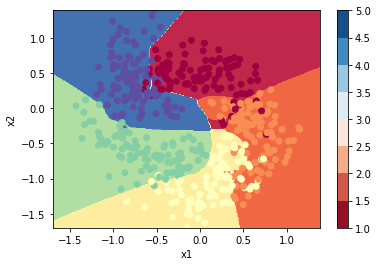

In [28]:
# reshape the predictions back into a grid
zz = y_label.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='RdBu')
plt.contourf(xx, yy, zz, cmap=plt.cm.Spectral)
plt.colorbar(c)
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(input_data[:, 0], input_data[:, 1], c=output_data, cmap=plt.cm.Spectral)